In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
trips_df = pd.read_csv("C:/Users/Gharat/Downloads/recommendation-engine/data/raw/trips.csv")

In [3]:
trips_df.head()

,trip_id,user_id,location_id,trip_date,actual_cost,duration_days
0,1,66,15,2022-03-08,6932.70,8
1,2,91,7,2023-09-17,5688.61,9
2,3,70,10,2024-01-23,22417.38,4
3,4,47,10,2021-04-10,6571.18,10
4,5,74,3,2022-11-19,10826.96,9


In [4]:
# Convert 'trip_date' to datetime
trips_df['trip_date'] = pd.to_datetime(trips_df['trip_date'])

# Extract features from date
trips_df['day_of_week'] = trips_df['trip_date'].dt.dayofweek  # 0: Monday, 6: Sunday
trips_df['month'] = trips_df['trip_date'].dt.month
trips_df['quarter'] = trips_df['trip_date'].dt.quarter
trips_df['year'] = trips_df['trip_date'].dt.year

In [5]:
# Log transformation of duration_days
trips_df['log_duration'] = np.log1p(trips_df['duration_days'])

In [6]:
# Bucketize the cost into categories
bins = [0, 5000, 10000, 20000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
trips_df['cost_category'] = pd.cut(trips_df['actual_cost'], bins=bins, labels=labels)

C:\Users\Gharat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gharat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


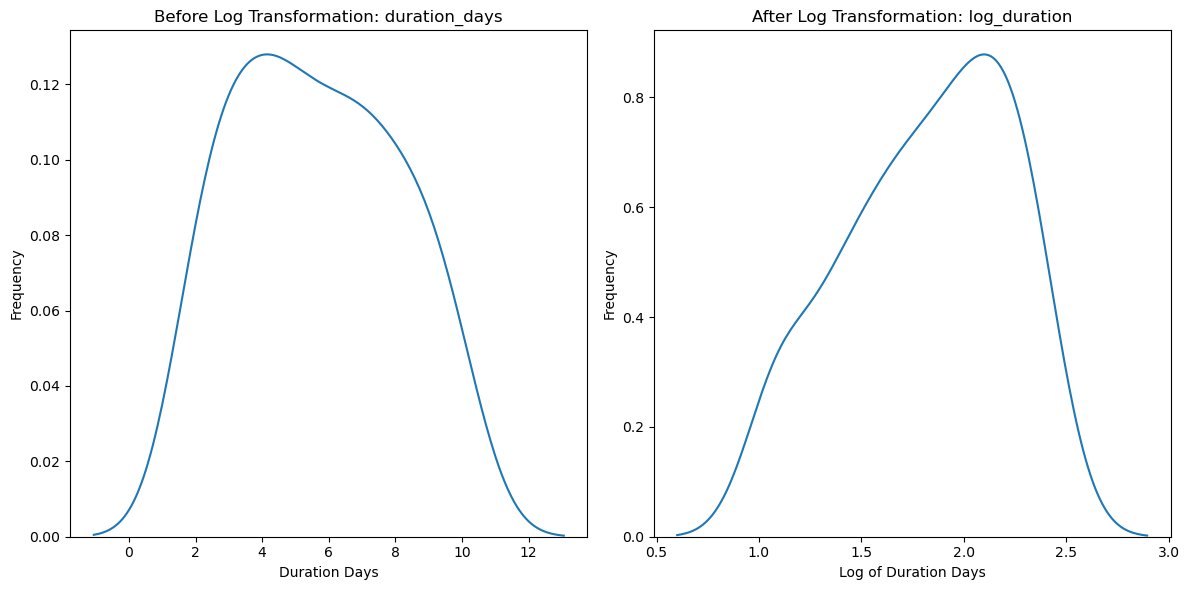

In [7]:
# Plot before and after transformation for duration_days (log transformation)
plt.figure(figsize=(12, 6))

# Before transformation (Duration Days)
plt.subplot(1, 2, 1)
sns.kdeplot(trips_df['duration_days'],)
plt.title('Before Log Transformation: duration_days')
plt.xlabel('Duration Days')
plt.ylabel('Frequency')

# After transformation (Log of Duration Days)
plt.subplot(1, 2, 2)
sns.kdeplot(trips_df['log_duration'])
plt.title('After Log Transformation: log_duration')
plt.xlabel('Log of Duration Days')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\Gharat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gharat\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


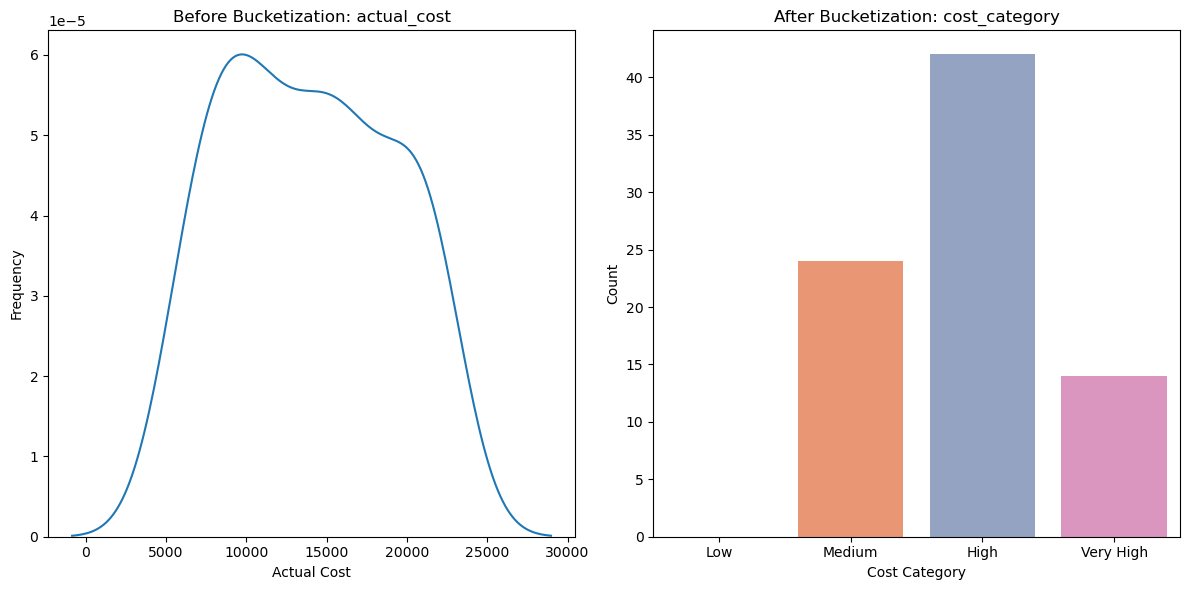

In [8]:
# Plot before and after transformation for actual_cost (Bucketization)
plt.figure(figsize=(12, 6))

# Before transformation (Actual Cost)
plt.subplot(1, 2, 1)
sns.kdeplot(trips_df['actual_cost'])
plt.title('Before Bucketization: actual_cost')
plt.xlabel('Actual Cost')
plt.ylabel('Frequency')

# After transformation (Cost Category)
plt.subplot(1, 2, 2)
sns.countplot(x=trips_df['cost_category'], palette='Set2')
plt.title('After Bucketization: cost_category')
plt.xlabel('Cost Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [9]:
trips_df.head()

,trip_id,user_id,location_id,trip_date,actual_cost,duration_days,day_of_week,month,quarter,year,log_duration,cost_category
0,1,66,15,2022-03-08,6932.70,8,1,3,1,2022,2.197225,Medium
1,2,91,7,2023-09-17,5688.61,9,6,9,3,2023,2.302585,Medium
2,3,70,10,2024-01-23,22417.38,4,1,1,1,2024,1.609438,Very High
3,4,47,10,2021-04-10,6571.18,10,5,4,2,2021,2.397895,Medium
4,5,74,3,2022-11-19,10826.96,9,5,11,4,2022,2.302585,High


In [10]:
# Feature Engineering - Cyclic Encoding for day_of_week and month
trips_df['day_of_week'] = trips_df['trip_date'].dt.dayofweek
trips_df['month'] = trips_df['trip_date'].dt.month

# Cyclic encoding for day_of_week (0-6, Monday-Sunday)
trips_df['sin_day_of_week'] = np.sin(2 * np.pi * trips_df['day_of_week'] / 7)
trips_df['cos_day_of_week'] = np.cos(2 * np.pi * trips_df['day_of_week'] / 7)

# Cyclic encoding for month (1-12)
trips_df['sin_month'] = np.sin(2 * np.pi * trips_df['month'] / 12)
trips_df['cos_month'] = np.cos(2 * np.pi * trips_df['month'] / 12)

# Feature Engineering - Interaction feature between 'duration_days' and 'actual_cost'
trips_df['duration_cost_interaction'] = trips_df['duration_days'] * trips_df['actual_cost']

In [11]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for 'cost_category'
one_hot_encoder = OneHotEncoder(sparse=False)
cost_category_encoded = one_hot_encoder.fit_transform(trips_df[['cost_category']])
cost_category_encoded_df = pd.DataFrame(cost_category_encoded, columns=one_hot_encoder.categories_[0])

# Concatenate one-hot encoded columns with the original dataframe
trips_df = pd.concat([trips_df, cost_category_encoded_df], axis=1)

C:\Users\Gharat\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
trips_df.head()

,trip_id,user_id,location_id,trip_date,actual_cost,duration_days,day_of_week,month,quarter,year,log_duration,cost_category,sin_day_of_week,cos_day_of_week,sin_month,cos_month,duration_cost_interaction,High,Medium,Very High
0,1,66,15,2022-03-08,6932.70,8,1,3,1,2022,2.197225,Medium,0.781831,0.623490,1.000000,6.123234e-17,55461.60,0.0,1.0,0.0
1,2,91,7,2023-09-17,5688.61,9,6,9,3,2023,2.302585,Medium,-0.781831,0.623490,-1.000000,-1.836970e-16,51197.49,0.0,1.0,0.0
2,3,70,10,2024-01-23,22417.38,4,1,1,1,2024,1.609438,Very High,0.781831,0.623490,0.500000,8.660254e-01,89669.52,0.0,0.0,1.0
3,4,47,10,2021-04-10,6571.18,10,5,4,2,2021,2.397895,Medium,-0.974928,-0.222521,0.866025,-5.000000e-01,65711.80,0.0,1.0,0.0
4,5,74,3,2022-11-19,10826.96,9,5,11,4,2022,2.302585,High,-0.974928,-0.222521,-0.500000,8.660254e-01,97442.64,1.0,0.0,0.0


In [14]:
trips_df.to_csv("C:/Users/Gharat/Downloads/recommendation-engine/data/processed/trips.csv", index=False)